# Individual Conditional (ICE) Expectation plots

In [37]:
# !pip install scikit-learn==1.0.1

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.inspection import PartialDependenceDisplay

In [6]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


## For a regression task

In [7]:
cal_housing = fetch_california_housing()

In [8]:
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
X = cal_housing.data
y = cal_housing.target
cal_features = cal_housing.feature_names

df = pd.concat((pd.DataFrame(X, columns=cal_features),
                pd.DataFrame({'MedianHouseVal': y})), axis=1)

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Define and train an MLP model

In [11]:
# Create models
mlp_reg = MLPRegressor(hidden_layer_sizes=[30, 20, 10],
                       max_iter=500)

# Create pipeline
transformer = ColumnTransformer([
    ('numerical', MinMaxScaler(feature_range=(-1,1)), cal_features),
])

mlp_pipeline = Pipeline(steps=[
    ('transform', transformer),
    ('model', mlp_reg)
])

# Create dataset
X_train, X_test, y_train, y_test = train_test_split(df[cal_features], y, test_size=0.2)

mlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('numerical',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('model',
                 MLPRegressor(hidden_layer_sizes=[30, 20, 10], max_iter=500))])

In [12]:
def compute_rmse(preds, labels):
    return np.sqrt(np.mean((preds - labels)**2))

In [13]:
model_rmse_error = compute_rmse(mlp_pipeline.predict(X_test), y_test)
print(f'Root mean squared error of MLP model: {model_rmse_error}')

Root mean squared error of MLP model: 0.627623424296529


Let's look at the feature `HouseAge` which represents the median house age in block.

In [38]:
FEATURE = 'HouseAge'

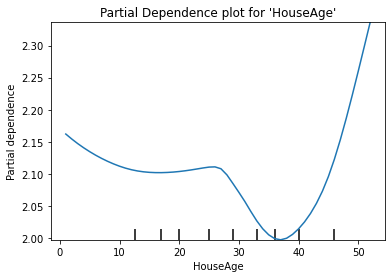

In [39]:
# First plot regular PDP
PartialDependenceDisplay.from_estimator(
    mlp_pipeline, X_train, features=[FEATURE],
    kind='average'
)
plt.title(f"Partial Dependence plot for '{FEATURE}'")
plt.show()

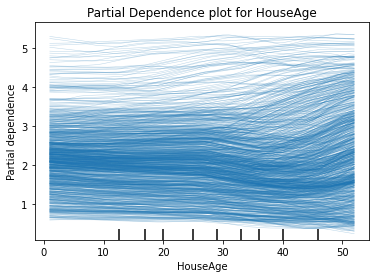

In [40]:
# Plot ICE to see indiividual examples
PartialDependenceDisplay.from_estimator(
    mlp_pipeline, X_train, features=[FEATURE],
    kind='individual'
)
plt.title(f'Partial Dependence plot for {FEATURE}')
plt.show()

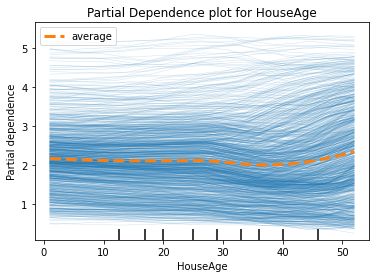

In [42]:
# Plot both on same axis
PartialDependenceDisplay.from_estimator(
    mlp_pipeline, X_train, features=[FEATURE],
    kind='both',
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--", "linewidth": 3.0},
)
plt.title(f'Partial Dependence plot for {FEATURE}')
plt.show()

Next, let's look at the feature `AveOccup` which represents average number of household members.

In [43]:
FEATURE = 'AveOccup'

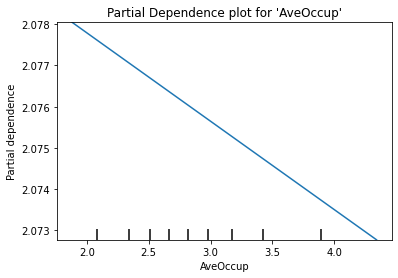

In [44]:
# First plot regular PDP
PartialDependenceDisplay.from_estimator(
    mlp_pipeline, X_train, features=[FEATURE],
    kind='average'
)
plt.title(f"Partial Dependence plot for '{FEATURE}'")
plt.show()

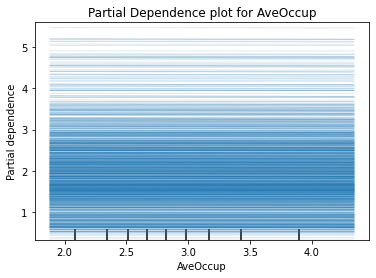

In [45]:
# Plot ICE to see indiividual examples
PartialDependenceDisplay.from_estimator(
    mlp_pipeline, X_train, features=[FEATURE],
    kind='individual'
)
plt.title(f'Partial Dependence plot for {FEATURE}')
plt.show()

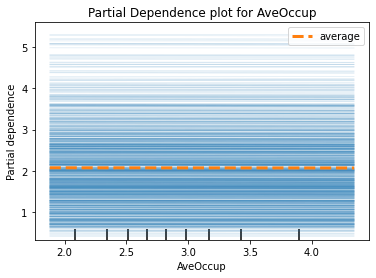

In [46]:
# Plot both on same axis
PartialDependenceDisplay.from_estimator(
    mlp_pipeline, X_train, features=[FEATURE],
    kind='both',
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--", "linewidth": 3.0},
)
plt.title(f'Partial Dependence plot for {FEATURE}')
plt.show()

Lastly, let's see all the features together for a more holistic view

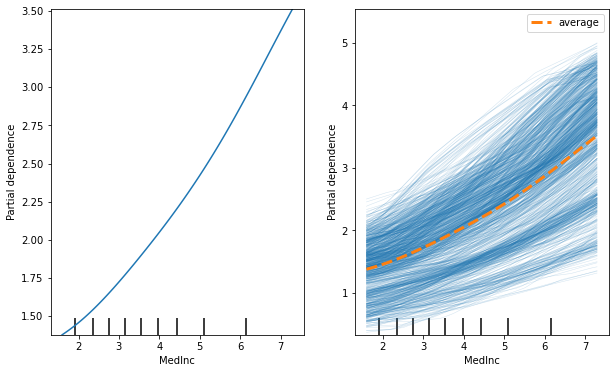

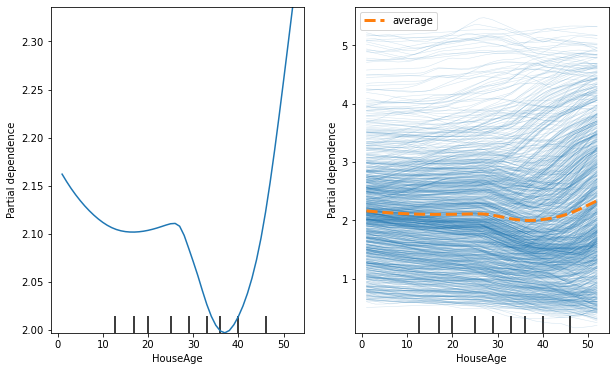

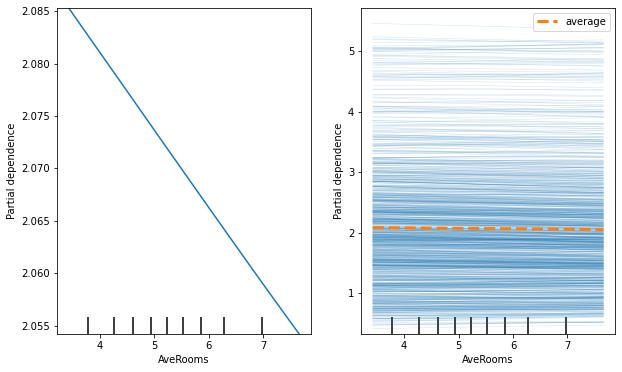

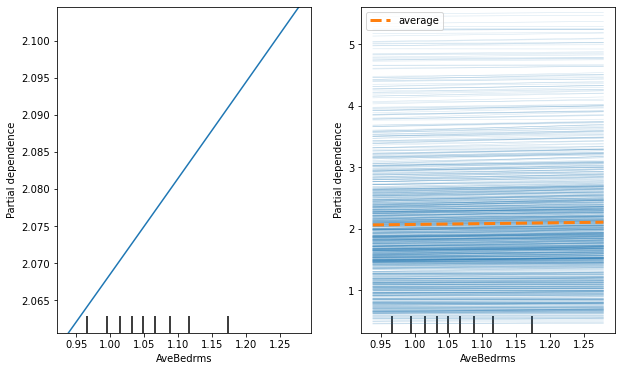

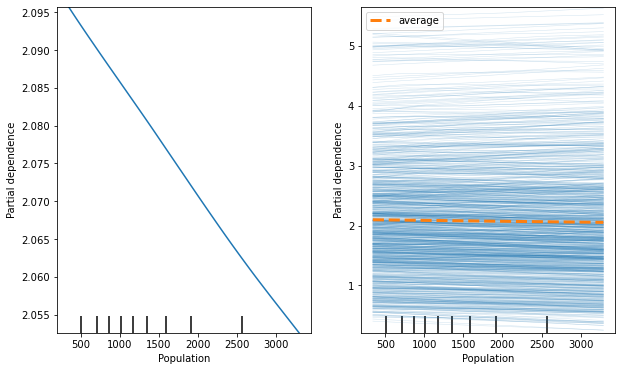

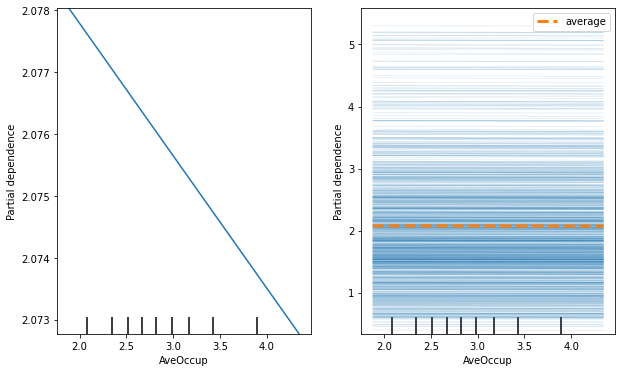

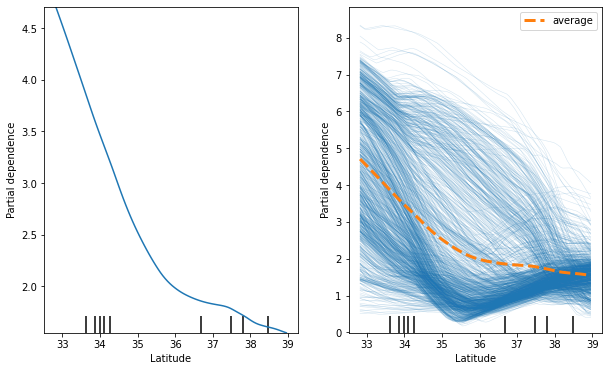

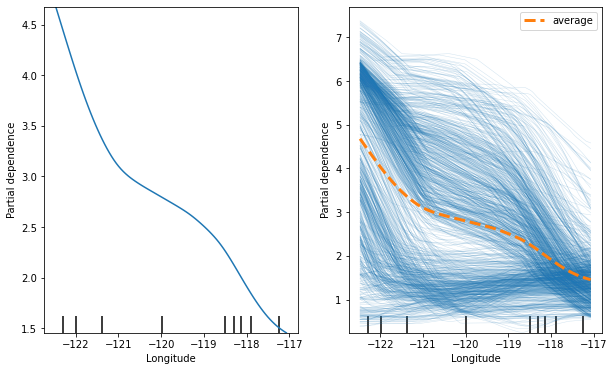

In [48]:
for feature in cal_features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
    PartialDependenceDisplay.from_estimator(
        mlp_pipeline, X_train, features=[feature],
        kind='average', ax=ax1)
    PartialDependenceDisplay.from_estimator(
        mlp_pipeline, X_train, features=[feature],
        kind='both',
        ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
        pd_line_kw={"color": "tab:orange", "linestyle": "--", "linewidth": 3.0},
        ax=ax2)
    plt.show()

Copyright 2022 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License